# Udacity Data Analyst Nanodegree
# P5: Identify Fraud from Enron Email

Author: Luiz Gerosa

Date: April 20, 2017

## Project Overview
In 2000, Enron was one of the largest companies in the United States. By 2002, it had collapsed into bankruptcy due to widespread corporate fraud. In the resulting Federal investigation, a significant amount of typically confidential information entered into the public record, including tens of thousands of emails and detailed financial data for top executives. 

The goal of this project is to build a person of interest (POI) identifier using machine learning.

### Person of Interest
A person of interest is an individual who was indicted, reached a settlement or plea deal with the government, or testified in exchange for prosecution immunity. The list of POI used in this project was hand-generated by Udacity team through information found on [news articles](http://usatoday30.usatoday.com/money/industries/energy/2005-12-28-enron-participants_x.htm). Below is the list of all POI found.

In [1]:
from pprint import pprint
poi_list = ['Lay, Kenneth','Skilling, Jeffrey','Howard, Kevin','Krautz, Michael','Yeager, Scott','Hirko, Joseph','Shelby, Rex','Bermingham, David','Darby, Giles','Mulgrew, Gary','Bayley, Daniel','Brown, James','Furst, Robert','Fuhs, William','Causey, Richard','Calger, Christopher','DeSpain, Timothy','Hannon, Kevin','Koenig, Mark','Forney, John','Rice, Kenneth','Rieker, Paula','Fastow, Lea','Fastow, Andrew','Delainey, David','Glisan, Ben','Richter, Jeffrey','Lawyer, Larry','Belden, Timothy','Kopper, Michael','Duncan, David','Bowen, Raymond','Colwell, Wesley','Boyle, Dan','Loehr, Christopher']
pprint(poi_list)

['Lay, Kenneth',
 'Skilling, Jeffrey',
 'Howard, Kevin',
 'Krautz, Michael',
 'Yeager, Scott',
 'Hirko, Joseph',
 'Shelby, Rex',
 'Bermingham, David',
 'Darby, Giles',
 'Mulgrew, Gary',
 'Bayley, Daniel',
 'Brown, James',
 'Furst, Robert',
 'Fuhs, William',
 'Causey, Richard',
 'Calger, Christopher',
 'DeSpain, Timothy',
 'Hannon, Kevin',
 'Koenig, Mark',
 'Forney, John',
 'Rice, Kenneth',
 'Rieker, Paula',
 'Fastow, Lea',
 'Fastow, Andrew',
 'Delainey, David',
 'Glisan, Ben',
 'Richter, Jeffrey',
 'Lawyer, Larry',
 'Belden, Timothy',
 'Kopper, Michael',
 'Duncan, David',
 'Bowen, Raymond',
 'Colwell, Wesley',
 'Boyle, Dan',
 'Loehr, Christopher']


## Exploratory Analysis

The dataset for this project was generated by Udacity team combining [Enron email](https://www.cs.cmu.edu/~./enron/) and [financial data]('./final_project/enron61702insiderpay.pdf') into a dictionary, where each key-value pair in the dictionary corresponds to one person. It's beyond the scope of this project to reproduce the steps necessary to generate the dataset.

To make the analysis easier, the Panda library was used to extract characteristics from the dataset.

In [2]:
%matplotlib inline

import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle

### Load the dictionary containing the dataset
with open("final_project/final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

df = pd.DataFrame(data_dict)
df = df.transpose()

# replace 'NaN' with Numpy's NaN
df.replace('NaN', np.nan, inplace=True)
df.dtypes

bonus                        float64
deferral_payments            float64
deferred_income              float64
director_fees                float64
email_address                 object
exercised_stock_options      float64
expenses                     float64
from_messages                float64
from_poi_to_this_person      float64
from_this_person_to_poi      float64
loan_advances                float64
long_term_incentive          float64
other                        float64
poi                             bool
restricted_stock             float64
restricted_stock_deferred    float64
salary                       float64
shared_receipt_with_poi      float64
to_messages                  float64
total_payments               float64
total_stock_value            float64
dtype: object

There are 146 observations, 20 features and 1 label in the dataset.

In [3]:
print('Observations: {}'.format(df.shape[0]))
print('Features: {}'.format(df.shape[1] - 1))

Observations: 146
Features: 20


The chart below shows the distribution between POI's and non POI's

Number of POI's: 18
Number of non POI's: 128


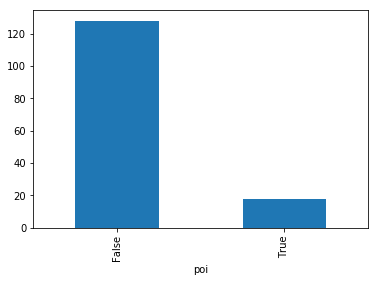

In [4]:
poi_count = sum(df['poi'])
non_poi_count = len(df['poi']) - poi_count
print('Number of POI\'s: {}'.format(poi_count))
print('Number of non POI\'s: {}'.format(non_poi_count))

df.groupby('poi').size().plot(kind='bar')

### Financial Features

There are 14 financial features. All units are US dollars.

In [5]:
financial_features = ['salary', 'bonus', 'long_term_incentive', 'deferred_income', 'deferral_payments', 'loan_advances', 'other', 'expenses', 'director_fees', 'total_payments', 'exercised_stock_options', 'restricted_stock', 'restricted_stock_deferred', 'total_stock_value']
df[financial_features].head()

,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value
ALLEN PHILLIP K,201955.0,4175000.0,304805.0,-3081055.0,2869717.0,NaN,152.0,13868.0,NaN,4484442.0,1729541.0,126027.0,-126027.0,1729541.0
BADUM JAMES P,NaN,NaN,NaN,NaN,178980.0,NaN,NaN,3486.0,NaN,182466.0,257817.0,NaN,NaN,257817.0
BANNANTINE JAMES M,477.0,NaN,NaN,-5104.0,NaN,NaN,864523.0,56301.0,NaN,916197.0,4046157.0,1757552.0,-560222.0,5243487.0
BAXTER JOHN C,267102.0,1200000.0,1586055.0,-1386055.0,1295738.0,NaN,2660303.0,11200.0,NaN,5634343.0,6680544.0,3942714.0,NaN,10623258.0
BAY FRANKLIN R,239671.0,400000.0,NaN,-201641.0,260455.0,NaN,69.0,129142.0,NaN,827696.0,NaN,145796.0,-82782.0,63014.0


Feature | Description 
:--- | :--- 
salary | Reflects items such as base salary, executive cash allowances, and benefits payments.
bonus  | Reflects annual cash incentives paid based upon company performance. Also may include other retention payments.
long_term_incentive | Reflects long-term incentive cash payments from various long-term incentive programs designed to tie executive compensation to long-term success as measuredagainst key performance drivers and business objectives over a multi-year period, generally 3 to 5 years.
deferred_income | Reflects voluntary executive deferrals of salary, annual cash incentives, and long-term cash incentives as well as cash fees deferred by non-employee directors under a deferred compensation arrangement. May also reflect deferrals under a stock option or phantom stock unit in lieu of cash arrangement.
deferral_payments | Reflects distributions from a deferred compensation arrangement due to termination of employment or due to in-service withdrawals as per plan provisions.
loan_advances | Reflects total amount of loan advances, excluding repayments, provided by the Debtor in return for a promise of repayment. In certain instances, the terms of the promissory notes allow for the option to repay with stock of the company.
other | Reflects items such as payments for severence, consulting services, relocation costs, tax advances and allowances for employees on international assignment (i.e. housing allowances, cost of living allowances, payments under Enron’s Tax Equalization Program, etc.). May also include payments provided with respect to employment agreements, as well as imputed income amounts for such things as use of corporate aircraft.
expenses | Reflects reimbursements of business expenses. May include fees paid for consulting services.
director_fees | Reflects cash payments and/or value of stock grants made in lieu of cash payments to non-employee directors.
total_payments | Total payments received
exercised_stock_options | Reflects amounts from exercised stock options which equal the market value in excess of the exercise price on the date the options were exercised either through cashless (same-day sale), stock swap or cash exercises. The reflected gain may differ from that realized by the insider due to fluctuations in the market price and the timing of any subsequent sale of the securities.
restricted_stock | Reflects the gross fair market value of shares and accrued dividends (and/or phantom units and dividend equivalents) on the date of release due to lapse of vesting periods, regardless of whether deferred.
restricted_stock_deferred | Reflects value of restricted stock voluntarily deferred prior to release under a deferred compensation arrangement.
total_stock_value | Total stock value

### Email Features
There are 6 e-mail features.

In [6]:
email_features = ['email_address', 'to_messages', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi']

df[email_features].head()

,email_address,to_messages,from_poi_to_this_person,from_messages,from_this_person_to_poi,shared_receipt_with_poi
ALLEN PHILLIP K,phillip.allen@enron.com,2902.0,47.0,2195.0,65.0,1407.0
BADUM JAMES P,NaN,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,james.bannantine@enron.com,566.0,39.0,29.0,0.0,465.0
BAXTER JOHN C,NaN,NaN,NaN,NaN,NaN,NaN
BAY FRANKLIN R,frank.bay@enron.com,NaN,NaN,NaN,NaN,NaN


Feature | Description
:-------| :----------
email_address | E-mail address
to_messages | Number of e-mails this person received
from_poi_to_this_person | Number of e-mails a POI sent to this person
from_messages | Number of e-mails this person sent
from_this_person_to_poi | Number of e-mails this person sent to a POI
shared_receipt_with_poi | Number of e-mails this person was c.c. with a POI

### Missing Values
The list below shows the number of missing values per feature.

In [7]:
df.isnull().sum()

bonus                         64
deferral_payments            107
deferred_income               97
director_fees                129
email_address                 35
exercised_stock_options       44
expenses                      51
from_messages                 60
from_poi_to_this_person       60
from_this_person_to_poi       60
loan_advances                142
long_term_incentive           80
other                         53
poi                            0
restricted_stock              36
restricted_stock_deferred    128
salary                        51
shared_receipt_with_poi       60
to_messages                   60
total_payments                21
total_stock_value             20
dtype: int64

In the case of this dataset, the NaN values should be replaced by 0, as discussed [here](https://discussions.udacity.com/t/what-is-the-proper-way-to-handle-nan/24593)


In [8]:
df.replace(np.nan, 0.0, inplace=True)

### Outlier
The dataset contains a huge outlier as can be observed ploting the *salary* and *bonus* features:

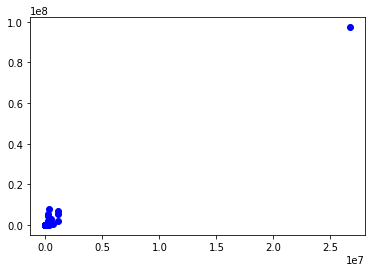

In [9]:
plt.scatter(df['salary'], df['bonus'], color = "b")

This outlier is actually a bug in the parser of the financial PDF that extract the row "TOTAL" as a person.

In [10]:
df[df['salary'] > 1e+07]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
TOTAL,97343619.0,32083396.0,-27992891.0,1398517.0,0,311764000.0,5235198.0,0.0,0.0,0.0,...,48521928.0,42667589.0,False,130322299.0,-7576788.0,26704229.0,0.0,0.0,309886585.0,434509511.0


After removing the *TOTAL* outlier and ploting the salary vs bonus again:

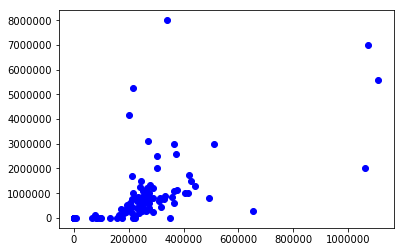

In [11]:
df = df.drop('TOTAL')
plt.scatter(df['salary'], df['bonus'], color = "b")

In [12]:
df[(df['salary'] > 500000) & (df['bonus'] > 300000)]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
FREVERT MARK A,2000000.0,6426990.0,-3367011.0,0.0,mark.frevert@enron.com,10433518.0,86987.0,21.0,242.0,6.0,...,1617011.0,7427621.0,False,4188667.0,0.0,1060932.0,2979.0,3275.0,17252530.0,14622185.0
LAY KENNETH L,7000000.0,202911.0,-300000.0,0.0,kenneth.lay@enron.com,34348384.0,99832.0,36.0,123.0,16.0,...,3600000.0,10359729.0,True,14761694.0,0.0,1072321.0,2411.0,4273.0,103559793.0,49110078.0
SKILLING JEFFREY K,5600000.0,0.0,0.0,0.0,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,30.0,...,1920000.0,22122.0,True,6843672.0,0.0,1111258.0,2042.0,3627.0,8682716.0,26093672.0
WHALLEY LAWRENCE G,3000000.0,0.0,0.0,0.0,greg.whalley@enron.com,3282960.0,57838.0,556.0,186.0,24.0,...,808346.0,301026.0,False,2796177.0,0.0,510364.0,3920.0,6019.0,4677574.0,6079137.0


The remaining outliers will not be removed because they are valid data points.

## Feature Selection/Engineering

### E-mail address
The *email_address* is an identifier, so it was removed.

In [13]:
df.drop('email_address', axis=1, inplace=True)

### E-mails exchanged with POI
A set of features that might help to predict POI's is the *from_poi_to_this_person* and *from_this_person_to_poi*. The scatter plot below shows the relation of these features and POI.

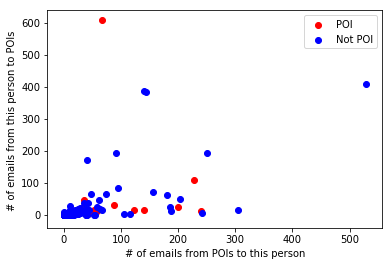

In [14]:
plt.scatter(df[df['poi']]['from_poi_to_this_person'], df[df['poi']]['from_this_person_to_poi'], color = "r", label="POI")
plt.scatter(df[df['poi'] == False]['from_poi_to_this_person'], df[df['poi'] == False]['from_this_person_to_poi'], color = "b", label="Not POI")
plt.xlabel('# of emails from POI''s to this person')
plt.ylabel('# of emails from this person to POI''s ')
plt.legend()


As can be observed, the total number of e-mails is not that helpfull to identify POI's. But the rate of e-mails gives a better result:

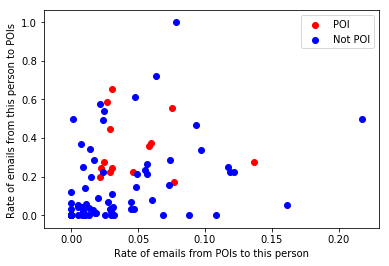

In [15]:
df = df.assign(fraction_to_poi = df['from_this_person_to_poi'].divide(df['from_messages']).replace(np.nan, 0.))
df = df.assign(fraction_from_poi = df['from_poi_to_this_person'].divide(df['to_messages']).replace(np.nan, 0.))

# dropping the original columns
df.drop(['from_this_person_to_poi', 'from_poi_to_this_person'], axis=1, inplace=True)

plt.scatter(df[df['poi']]['fraction_from_poi'], df[df['poi']]['fraction_to_poi'], color = "r", label="POI")
plt.scatter(df[df['poi'] == False]['fraction_from_poi'], df[df['poi'] == False]['fraction_to_poi'], color = "b", label="Not POI")
plt.xlabel('Rate of emails from POI''s to this person')
plt.ylabel('Rate of emails from this person to POI''s ')
plt.legend()

### Feature Importance
The list below shows the features by order of importance.

In [16]:
features_list = df.columns.drop('poi').values
poi_index = df.columns.get_loc('poi')

array = df.values

labels = array[:,poi_index]
features = np.delete(array, poi_index, 1)


from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)


from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=11)

selector.fit(features_train, labels_train)

features_score = pd.Series(selector.scores_, index=features_list).sort_values(ascending=False)
print(features_score)

bonus                        23.823685
exercised_stock_options      18.063262
total_stock_value            17.318473
fraction_to_poi              13.310537
salary                       11.776270
total_payments                8.086025
shared_receipt_with_poi       7.991074
deferred_income               7.513180
restricted_stock              6.784691
loan_advances                 6.493476
long_term_incentive           5.872273
other                         3.803317
to_messages                   3.423188
expenses                      3.027750
director_fees                 1.701855
fraction_from_poi             0.836899
restricted_stock_deferred     0.750253
from_messages                 0.443461
deferral_payments             0.046298
dtype: float64


/Users/luizgerosa/miniconda3/envs/intro-ml/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Machine Learning Algorithm

### Naive Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

